     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 
The results of our simulated circuit are: 
{'00000': 462, '11111': 538}


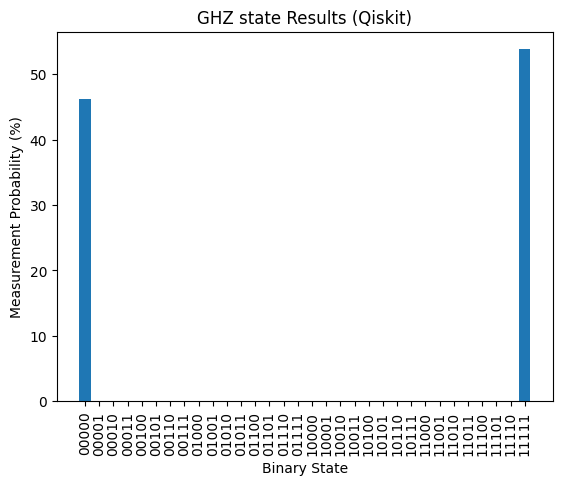

In [6]:
# =======================
# Importing the libraries
# =======================

# Core library from "quantumgateway" that lets us define circuits and gates 
from quantumgateway.quantum_circuit import QuantumCircuit, QuantumGate

# Translators: these take our abstract circuit and convert it into code 
# for specific frameworks (Qiskit, Braket, Cirq, PennyLane, PyQuil).
from quantumgateway.quantum_translator.braket_translator import BraketTranslator
from quantumgateway.quantum_translator.cirq_translator import CirqTranslator
from quantumgateway.quantum_translator.qiskit_translator import QiskitTranslator
from quantumgateway.quantum_translator.pennylane_translator import PennyLaneTranslator
from quantumgateway.quantum_translator.pyquil_translator import PyQuilTranslator

# Main functions: used to translate and simulate circuits regardless of framework
from quantumgateway.main import translate_to_framework, simulate_circuit

# Standard Python math library
import math

# =======================
# Circuit Definition
# =======================

# Create a 5-qubit, 5-classical-bit circuit (for GHZ state)
qc = QuantumCircuit(5, 5)

# Apply gates to generate the GHZ state
qc.add_gate(QuantumGate("H", [0]))       # Hadamard on qubit 0
qc.add_gate(QuantumGate("CNOT", [0, 1])) # Entangle qubit 0 with 1
qc.add_gate(QuantumGate("CNOT", [1, 2])) # Entangle qubit 1 with 2
qc.add_gate(QuantumGate("CNOT", [2, 3])) # Entangle qubit 2 with 3
qc.add_gate(QuantumGate("CNOT", [3, 4])) # Entangle qubit 3 with 4

# Add measurement operations (map each qubit to its classical bit)
for i in range(5):
    qc.add_gate(QuantumGate("MEASURE", [i, i]))

# =======================================
# Translating the circuit to a framework
# =======================================

# Here we choose the framework we want to use (qiskit, cirq, pyquil, pennylane or amazonbraket)
# By default, we select Qiskit
selected_framework = 'qiskit'  
# Translate the circuit from "quantumgateway" to the chosen framework
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

# =======================================
# Circuit Simulation
# =======================================

# For plotting histograms
import matplotlib.pyplot as plt

# Simulate the circuit execution in the chosen framework
print("The results of our simulated circuit are: ")
# Run simulation on the selected framework
# Returns measurement outcomes (e.g. {"00000": 512, "11111": 512})
counts = simulate_circuit(qc, selected_framework)
print(counts)

# =======================================
# Post-processing and visualization
# =======================================

# Compute total shots and normalize counts into percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Generate all possible 5-qubit states (32 total)
all_states = [format(i, '05b') for i in range(2**5)]

# Create a bar plot showing the probabilities
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')   # X-axis label
plt.ylabel('Measurement Probability (%)') # Y-axis label
plt.title('GHZ state Results (Qiskit)')   # Title of the plot
plt.xticks(rotation='vertical')  # Rotate x-axis labels
# Show the histogram
plt.show()

0: ───H───@───M('result0')────────────────────────────────────────────────
          │
1: ───────X───@──────────────M('result1')─────────────────────────────────
              │
2: ───────────X──────────────@──────────────M('result2')──────────────────
                             │
3: ──────────────────────────X──────────────@──────────────M('result3')───
                                            │
4: ─────────────────────────────────────────X──────────────M('result4')───
The results of our simulated circuit are: 
{'11111': 531, '00000': 469}


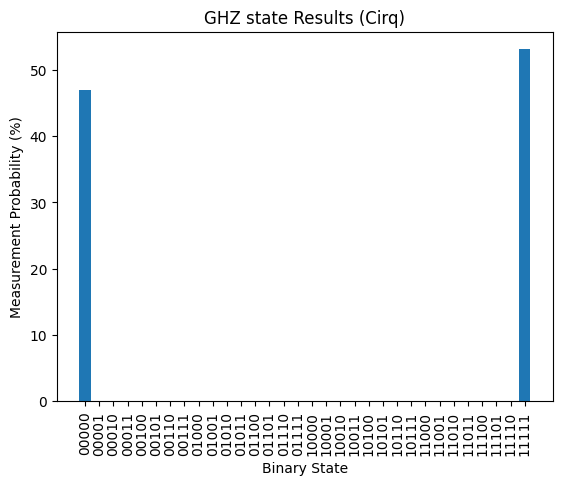

In [2]:
# We can proceed to see how the quantum circuit looks like in cirq's PyQuil 

selected_framework = 'cirq' 
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

# Finally, we simulate the circuit
import matplotlib.pyplot as plt

print("The results of our simulated circuit are: ")
counts = simulate_circuit(qc, selected_framework)
print(counts)

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '05b') for i in range(2**5)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (Cirq)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

DECLARE ro BIT[5]
H 0
CNOT 0 1
CNOT 1 2
CNOT 2 3
CNOT 3 4
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]
MEASURE 3 ro[3]
MEASURE 4 ro[4]

The results of our simulated circuit are: 
{'11111': 531, '00000': 469}


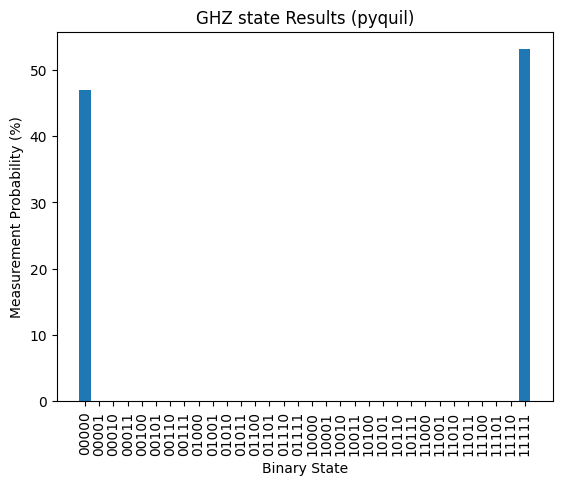

In [3]:
# we can proceed to see how the quantum circuit looks like in Rigetti's PyQuil 
selected_framework = 'pyquil' # Change this to the desired framework
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

print("The results of our simulated circuit are: ")
print(counts)

import matplotlib.pyplot as plt

total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

all_states = [format(i, '05b') for i in range(2**5)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (pyquil)')
plt.xticks(rotation='vertical')  
plt.show()

0: ──H─╭●──────────┤  Sample[Z]
1: ────╰X─╭●───────┤  Sample[Z]
2: ───────╰X─╭●────┤  Sample[Z]
3: ──────────╰X─╭●─┤  Sample[Z]
4: ─────────────╰X─┤  Sample[Z]
The results of our simulated circuit are: 
{'00000': 499, '11111': 501}


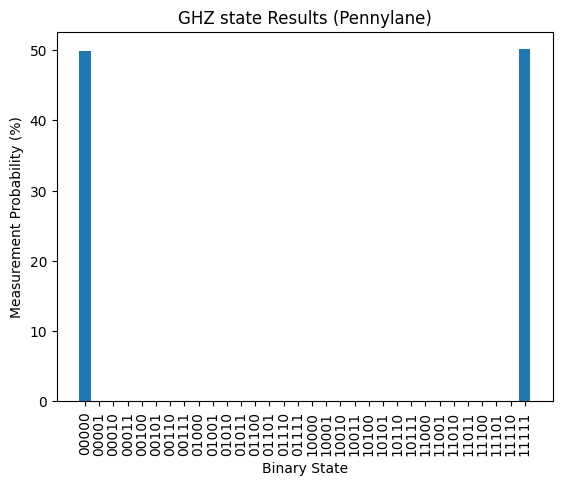

In [4]:
# We can proceed to see how the quantum circuit looks like in Xanadu's PennyLane
selected_framework = 'pennylane' 
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

import matplotlib.pyplot as plt
print("The results of our simulated circuit are: ")
counts = simulate_circuit(qc, selected_framework)
print(counts)

total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

all_states = [format(i, '05b') for i in range(2**5)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (Pennylane)')
plt.xticks(rotation='vertical')  
plt.show()

T  : |0|1|2|3|4|
                
q0 : -H-C-------
        |       
q1 : ---X-C-----
          |     
q2 : -----X-C---
            |   
q3 : -------X-C-
              | 
q4 : ---------X-

T  : |0|1|2|3|4|
The results of our simulated circuit are: 
{'11111': 467, '00000': 533}


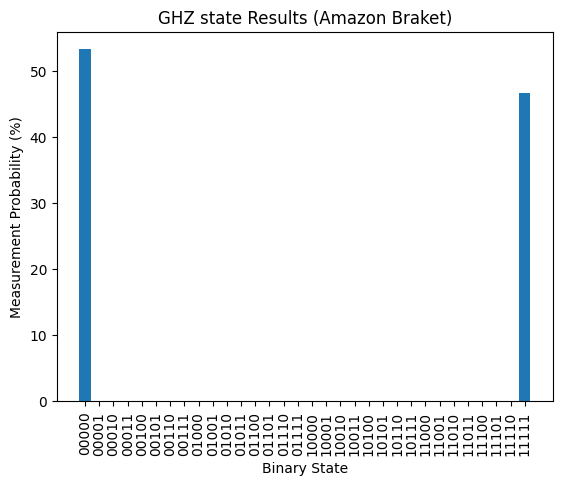

In [5]:
# and finaly Amazon's Braket
selected_framework = 'amazonbraket' 
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

import matplotlib.pyplot as plt

print("The results of our simulated circuit are: ")
counts = simulate_circuit(qc, selected_framework)
print(counts)

total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

all_states = [format(i, '05b') for i in range(2**5)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (Amazon Braket)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()